**Importando bibliotecas**

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import random

**Criando base**
 
Para facilitar, vamos criar dois conjunto de dados, que serão: 
 
- A primeira será uma distribuição uniforme continuo -> $U[-100;100]$, e;
- A segunda será uma distribuição normal -> $N[0;25]$.

In [2]:
dados= {"Uniforme": [random.uniform(-100,100) for x in range(25)],
        "Normal": [random.normalvariate(0, 25) for x in range(25)]}
df= pd.DataFrame(dados)
df.head()

,Uniforme,Normal
0,-92.444480,42.133361
1,48.529510,-9.778938
2,66.856653,64.692565
3,-60.220916,-2.155759
4,53.415117,24.698990


**Visualizando dados**

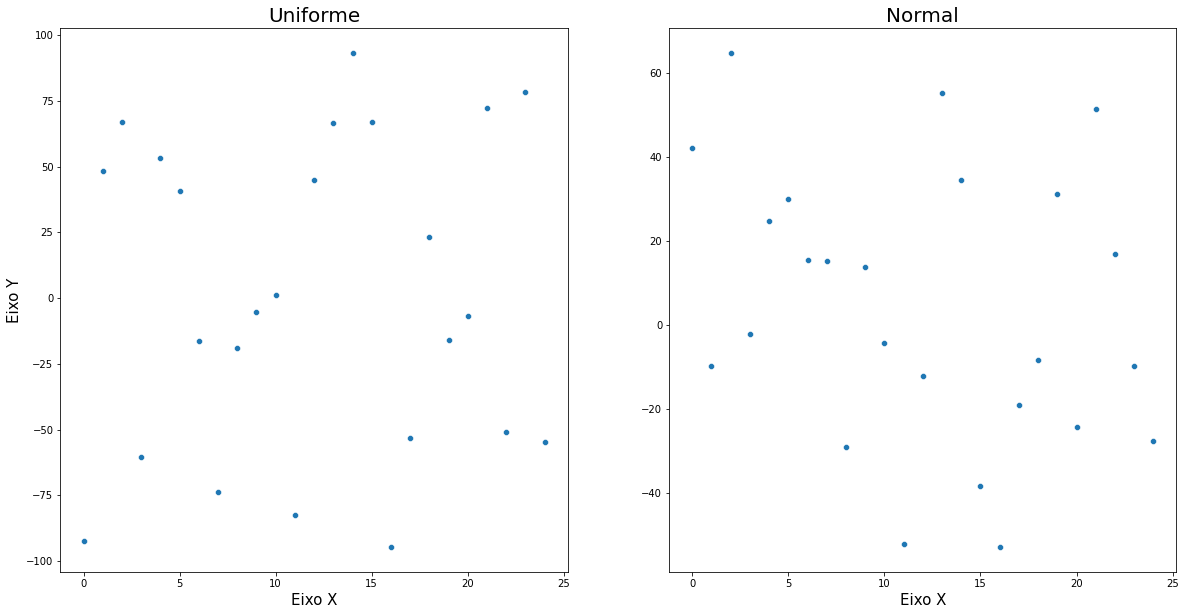

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

g1= sns.scatterplot(data= df, x= range(0,25), y= "Uniforme", ax=axes[0])
g1.set_title("Uniforme", fontsize= 20)
g1.set_xlabel("Eixo X", fontsize= 15)
g1.set_ylabel("Eixo Y", fontsize= 15)

g2= sns.scatterplot(data= df, x= range(0,25), y= "Normal", ax=axes[1])
g2.set_title("Normal", fontsize= 20)
g2.set_xlabel("Eixo X", fontsize= 15)
g2.set_ylabel("")

plt.show()

**Binarizer**
 
Nesse notebook, vamos falar sobre o método binarizer, como o nome já dá a ideia do que seja, ela se baseia em números binários. Ela segue uma regra bem simples, se um número estiver no domínio, $X \leq n$, onde n é um valor do conjuntos dos reais, seu valor será igual a zero, e caso o seu domínio seja, $X > n$, seu resultado será igual a 1.
 
Ex.
 
Dados: {1, 2, 4, 6, -7}
 
limitador: 4
  
resultado: {0, 0, 1 ,1 ,0}

In [10]:
def binarizer(lista, limitador=0):
  resultado= [0 if x <= limitador else 1 for x in lista]        # List Comprehension

  return(resultado)

In [11]:
novo_U= binarizer(df['Uniforme'].to_list())
novo_N= binarizer(df['Normal'].to_list())

**Comparar os valores atualizados com os antigos**

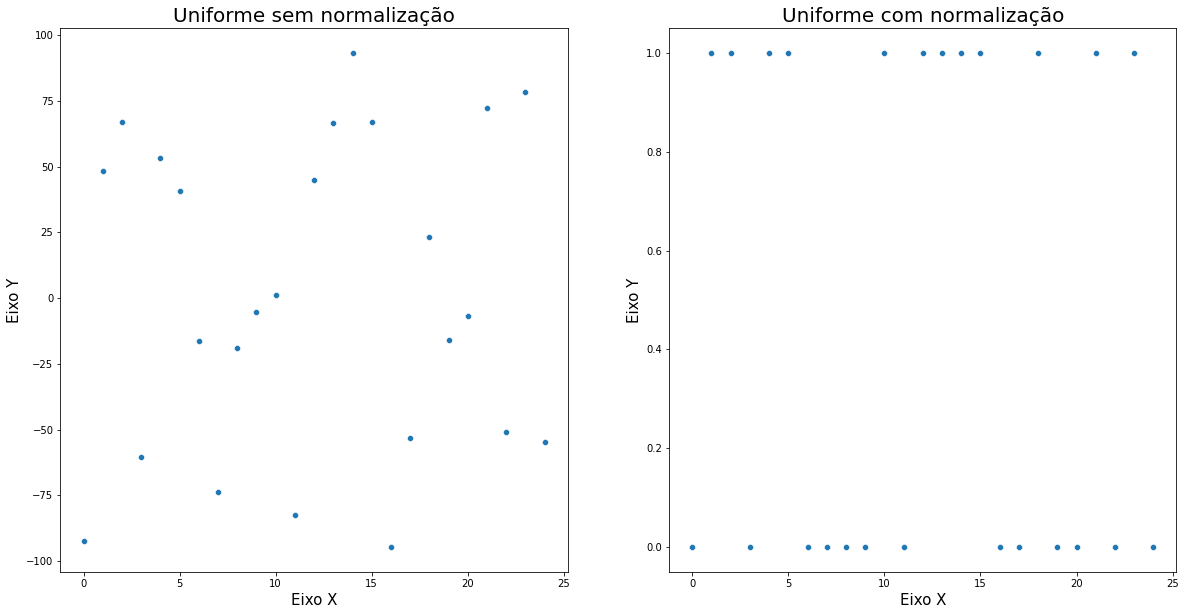

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

g1= sns.scatterplot(data= df, x= range(0,25), y= "Uniforme", ax=axes[0])
g1.set_title("Uniforme sem normalização", fontsize= 20)
g1.set_xlabel("Eixo X", fontsize= 15)
g1.set_ylabel("Eixo Y", fontsize= 15)

g2= sns.scatterplot(data= novo_U, ax=axes[1])
g2.set_title("Uniforme com normalização", fontsize= 20)
g2.set_xlabel("Eixo X", fontsize= 15)
g2.set_ylabel("Eixo Y", fontsize= 15)

plt.show()

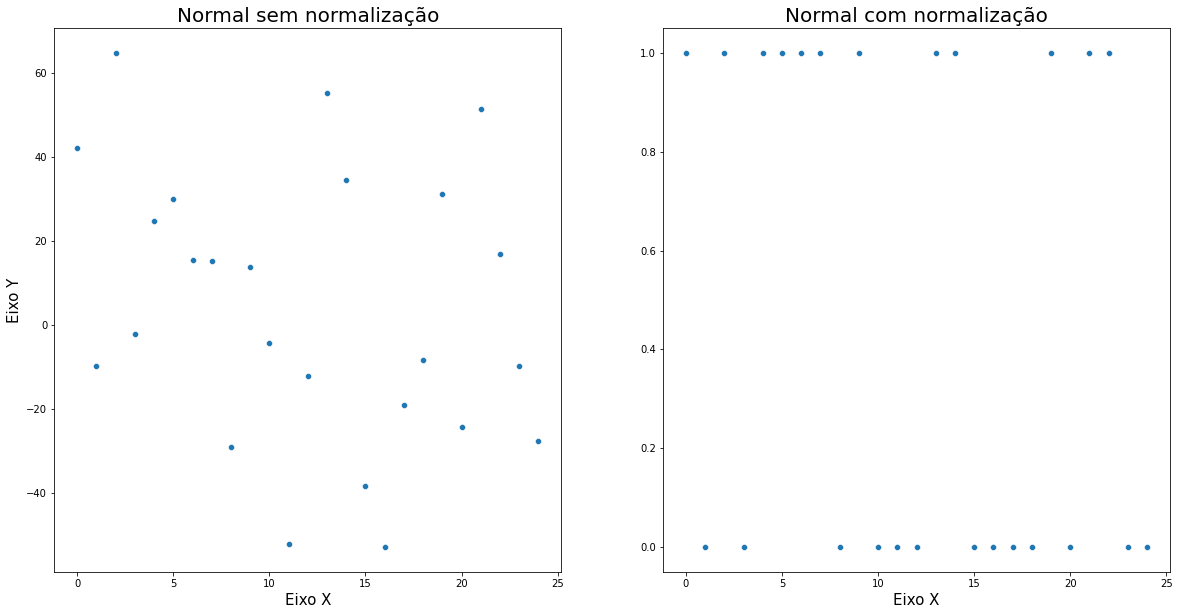

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

g1= sns.scatterplot(data= df, x= range(0,25), y= "Normal", ax=axes[0])
g1.set_title("Normal sem normalização", fontsize= 20)
g1.set_xlabel("Eixo X", fontsize= 15)
g1.set_ylabel("Eixo Y", fontsize= 15)

g2= sns.scatterplot(data= novo_N, ax=axes[1])
g2.set_title("Normal com normalização", fontsize= 20)
g2.set_xlabel("Eixo X", fontsize= 15)
g2.set_ylabel("")

plt.show()

**Utiliizando Sklearn**

In [14]:
from sklearn.preprocessing import Binarizer

modelo_Binarizer= Binarizer(threshold= 0.0)

novo_df= pd.DataFrame(modelo_Binarizer.fit_transform(df)).rename({0:"Uniforme", 1: "Normal"}, axis= 1)
novo_df.head()

,Uniforme,Normal
0,0.0,1.0
1,1.0,0.0
2,1.0,1.0
3,0.0,0.0
4,1.0,1.0


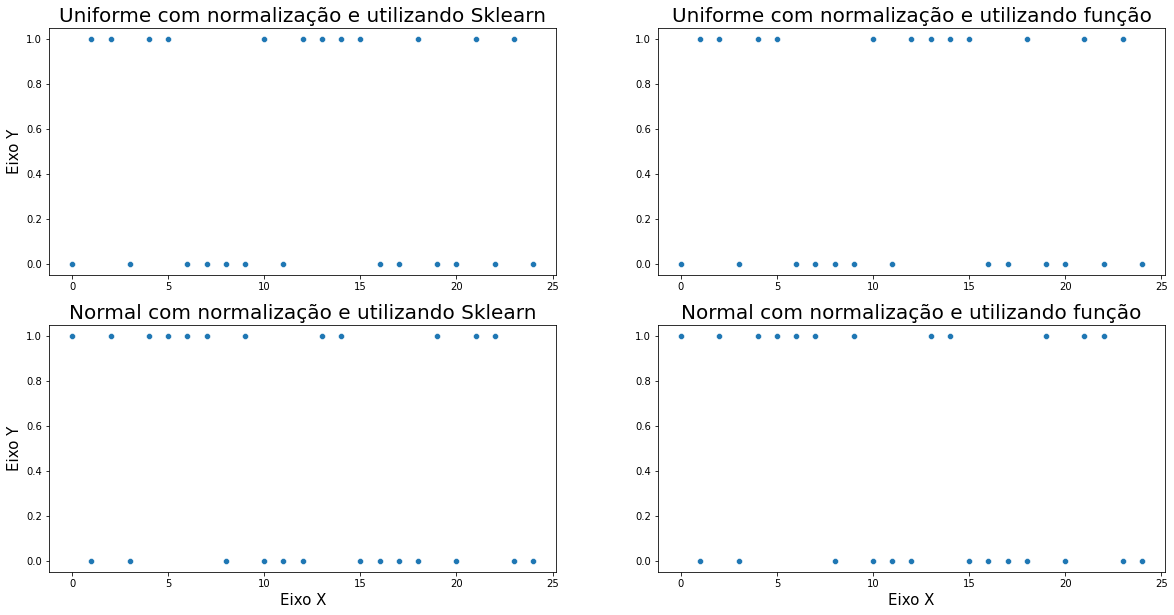

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

g1= sns.scatterplot(data= novo_df, x= range(0,25), y= "Uniforme", ax=axes[0,0])
g1.set_title("Uniforme com normalização e utilizando Sklearn", fontsize= 20)
g1.set_ylabel("Eixo Y", fontsize= 15)

g2= sns.scatterplot(data= novo_U, ax=axes[0,1])
g2.set_title("Uniforme com normalização e utilizando função", fontsize= 20)


g3= sns.scatterplot(data= novo_df, x= range(0,25), y= "Normal", ax=axes[1,0])
g3.set_title("Normal com normalização e utilizando Sklearn", fontsize= 20)
g3.set_xlabel("Eixo X", fontsize= 15)
g3.set_ylabel("Eixo Y", fontsize= 15)

g4= sns.scatterplot(data= novo_N, ax=axes[1,1])
g4.set_title("Normal com normalização e utilizando função", fontsize= 20)
g4.set_xlabel("Eixo X", fontsize= 15)
g4.set_ylabel("", fontsize= 15)

plt.show()